## Testing How to Get Intensity and Wavelength from Webcam Spectra Images

### Sources for help: 
#### - https://www.mathworks.com/matlabcentral/answers/1901170-how-to-plot-intensity-vs-wavelength-of-an-image
#### - https://copyprogramming.com/howto/how-to-plot-graph-the-intensity-versus-wavelength-for-the-spectrum
#### - https://imagemagick.org/script/convert.php

### MatLab Code 

In [59]:
% get image
inpict = imread('https://www.mathworks.com/matlabcentral/answers/uploaded_files/1277300/image.png');

% crop out relevant region
% this relies on the pattern being grid-aligned
inpict = imcrop(inpict,[72, 68, 305, 20]);

% convert to grayscale somehow
%inpict = mean(im2double(inpict),3); % average?
%inpict = rgb2gray(im2double(inpict)); % BT601 luma?
inpict = imapplymatrix([0.2126 0.7152 0.0722],im2double(inpict)); % BT709 luma?
% ... or use some sort of system-specific intensity calibration information

% generate profile by averaging off-axis
% again, this relies on the pattern being grid-aligned
profile = mean(inpict,1);

% rough frequency calibration
lbref = [494, 693] # wavelengths of known peaks
idx = [77, 209]; % the indices in profile corresponding to those peaks (manually picked)
lambda = interp1(idx,lbref,1:numel(profile),'linear','extrap');

% generate patch vertex coordinates
xx = [lambda fliplr(lambda)];
yy = [profile zeros(size(profile))];

% create color data for each vertex pair
CT = getcdata(lambda);
cc = [1:numel(lambda), numel(lambda):-1:1];

% plot the profile
patch(xx,yy,cc);
xlim([min(lambda) max(lambda)])
colormap(CT)
function CT = getcdata(vtxlambda)
    % location of gradient breakpoints (in wavelength)
    x0 = [312 381 403 419 440 492 512 580 646 652 779 927];
    CT0 = [0 0 0; 0 0 0; 0.353 0 0.563; 0.353 0 1; 0 0 1; 0 1 1;
	       0 1 0; 1 1 0; 1 0 0; 1 0 0; 0 0 0; 0 0 0];
    
    % look up colormap colors for each vertex lambda
    CT = interp1(x0,CT0,vtxlambda,'linear','extrap');


SyntaxError: invalid syntax (109735942.py, line 19)

### Python Plotting Intensity versus Wavelength 
##### There is a way to have imageio open the webcam to take image data -- could be useful later on - look at Webcam in the docs: https://imageio.readthedocs.io/en/stable/user_guide/requests.html

In [5]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

(209, 668, 4)
[[[  6   2   4 255]
  [  6   2   4 255]
  [  6   2   4 255]
  ...
  [  2   1   7 255]
  [  2   1   6 255]
  [  2   1   6 255]]

 [[  3   1   3 255]
  [  3   1   3 255]
  [  3   1   3 255]
  ...
  [  0   1  12 255]
  [  0   2  10 255]
  [  0   2   9 255]]

 [[  3   1   3 255]
  [  3   1   3 255]
  [  3   1   3 255]
  ...
  [  0   1  12 255]
  [  0   2  10 255]
  [  0   2   9 255]]

 ...

 [[  3   0   8 255]
  [  3   0   8 255]
  [  3   0   8 255]
  ...
  [  3   1   6 255]
  [  3   1   6 255]
  [  3   1   6 255]]

 [[  3   2   2 255]
  [  3   2   2 255]
  [  3   2   2 255]
  ...
  [  3   1   6 255]
  [  3   1   6 255]
  [  3   1   6 255]]

 [[  7   5   7 255]
  [  7   5   7 255]
  [  7   5   7 255]
  ...
  [  5   8   8 255]
  [  5   8   8 255]
  [  4   7   7 255]]]


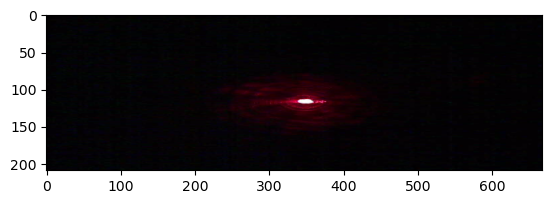

In [6]:
""" Reading in Image """
img_path = "/Users/ashleylieber/Downloads/0_14.png"
img = iio.imread(img_path)
print(img.shape)
print(img)
plt.imshow(img)

In [7]:
type(img)

numpy.ndarray

In [8]:
img[104(0)]

<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
/var/folders/m_/6w36s5f17kl3wrv42q59syqr0000gq/T/ipykernel_99624/2988505708.py:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  img[104(0)]


TypeError: 'int' object is not callable

In [9]:
img[0,0,1].max()

2

In [10]:
""" MetaData """
metadata = iio.immeta(img_path)
print(metadata["mode"])
print(metadata)
# RGBA means Red Green Blue Alpha where the fourth channel, alpha, is only useful to make the transparent/opaque color unique to PNGs. No useful spectral data

RGBA
{'gamma': 0.45455, 'chromaticity': (0.3127, 0.329, 0.64, 0.33, 0.3, 0.6, 0.15, 0.06), 'exif': b'Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x05\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00J\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00R\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00Z\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x01\x00\x00\x00`\x00\x00\x00\x01\x00\x03\xa0\x01\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x02\x9c\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x00\xd1\x00\x00\x00\x00', 'dpi': (96.012, 96.012), 'XML:com.adobe.xmp': '<x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="XMP Core 6.0.0">\n   <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n      <rdf:Description rdf:about=""\n            xmlns:tiff="http://ns.adobe.com/tiff/1.0/">\n         <tiff:Orientation>1</tiff:Orientation>\n      </rdf:Description>\n   </rdf:RDF>\n</x:xmpmeta>\n', 'mode

In [11]:
""" Image Properties """
props = iio.improps(img_path)
print(props)

ImageProperties(shape=(209, 668, 4), dtype=dtype('uint8'), is_batch=False, spacing=None)


In [12]:
#import spectral.io.aviris as aviris
#from spectral import *
#imgs = open_image(img_path)
#img.bands = aviris.read_aviris_bands(img_path)

In [13]:
def getSpectrum_PNG(filename):                                     #
    '''From a PNG file taken with spectralworkbench
        extracts a spectrum. Each channel's spectrum
        is calculated as column mean for the whole picture'''          #
    #
    # Reading the image                                            #
    print("Reading image")                                         #
    image = iio.imread(filename)                                   #
    #
    # Preparing the variables                                      #
    imageR = []                                                    #
    imageG = []                                                    #
    imageB = []                                                    #
    imgWidth = len(image[0])                                       #
    imgHeight = len(image)                                         #
    #
    # Preparing the RGB arrays                                     #
    for i in range(imgWidth):                                      #
        imageR.append(image[0][i][0])                              #
        imageG.append(image[0][i][1])                              #
        imageB.append(image[0][i][2])                              #
    #
    # Columns summatory                                            #
    for i in range(imgHeight):                                     #
        for j in range(imgWidth):                                  #
            imageR[j]=imageR[j]+image[i][j][0]                     #
            imageG[j]=imageG[j]+image[i][j][1]                     #
            imageB[j]=imageB[j]+image[i][j][2]                     #
    #
    # Calculating the mean for every RGB column                    #
    for i in range(imgWidth):                                      #
        imageR[i]=imageR[i]/imgHeight                              #
        imageG[i]=imageG[i]/imgHeight                              #
        imageB[i]=imageB[i]/imgHeight                              #
    #
    # Merging the RGB channels by addition                         #
    spectrum = []                                                  #
    for i in range(imgWidth):                                      #
        spectrum.append((imageR[i]+imageG[i]+imageB[i])/3)         #
    #
    # returning the results of the operation                       #
    return spectrum   

Reading image


/var/folders/m_/6w36s5f17kl3wrv42q59syqr0000gq/T/ipykernel_99624/2805089777.py:26: RuntimeWarning: overflow encountered in ubyte_scalars
  imageR[j]=imageR[j]+image[i][j][0]                     #
/var/folders/m_/6w36s5f17kl3wrv42q59syqr0000gq/T/ipykernel_99624/2805089777.py:27: RuntimeWarning: overflow encountered in ubyte_scalars
  imageG[j]=imageG[j]+image[i][j][1]                     #
/var/folders/m_/6w36s5f17kl3wrv42q59syqr0000gq/T/ipykernel_99624/2805089777.py:28: RuntimeWarning: overflow encountered in ubyte_scalars
  imageB[j]=imageB[j]+image[i][j][2]                     #


(0.0, 0.5)

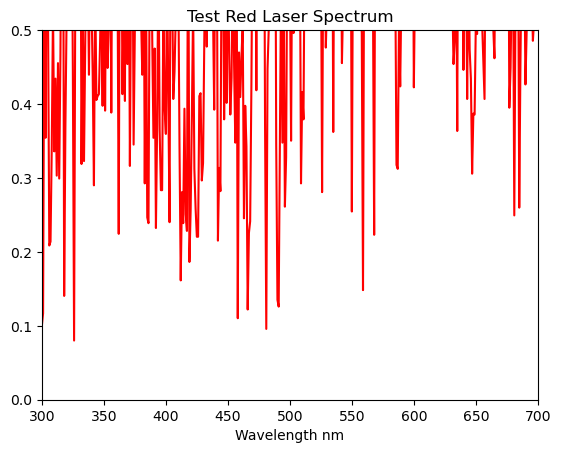

In [14]:
file = "/Users/ashleylieber/Downloads/0_21.png"
reference = getSpectrum_PNG(file)
reference

plt.plot(reference, color='red')
plt.title("Test Red Laser Spectrum")
plt.xlabel("Wavelength nm")
plt.xlim(300,700)
plt.ylim(0,0.50)

Max values and scale according to that

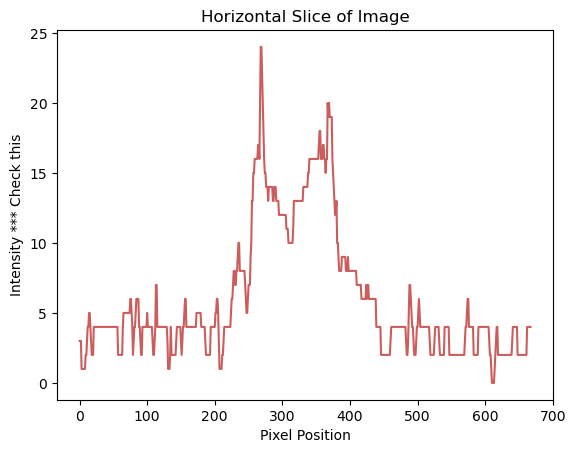

In [15]:
import matplotlib.pyplot as plt
img = iio.imread(img_path, mode='L')
mid_line = img[len(img)//2]
plt.plot(mid_line, color='indianred')
plt.xlabel('Pixel Position')
plt.ylabel('Intensity *** Check this')
plt.title("Horizontal Slice of Image")
plt.show()

In [16]:
len(mid_line)

668

In [17]:
mid_line

array([ 3,  3,  3,  1,  1,  1,  1,  1,  1,  2,  2,  3,  4,  4,  5,  5,  4,
        3,  2,  2,  2,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  2,  2,  2,  2,  2,  2,  2,  4,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  5,  4,  2,  3,  4,  4,  5,  6,
        6,  6,  6,  4,  4,  3,  2,  2,  4,  4,  4,  4,  4,  4,  4,  5,  4,
        4,  4,  4,  4,  4,  4,  3,  2,  2,  3,  4,  7,  7,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  1,  1,  1,  2,  4,
        2,  2,  2,  2,  2,  2,  2,  3,  4,  4,  4,  4,  4,  4,  3,  2,  3,
        4,  4,  5,  6,  6,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  4,  4,  4,  4,  4,  4,  3,
        2,  2,  2,  2,  2,  2,  2,  4,  4,  4,  4,  4,  4,  4,  5,  5,  6,
        6,  5,  3,  1,  1,  1,  1,  2,  2,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  5,  6

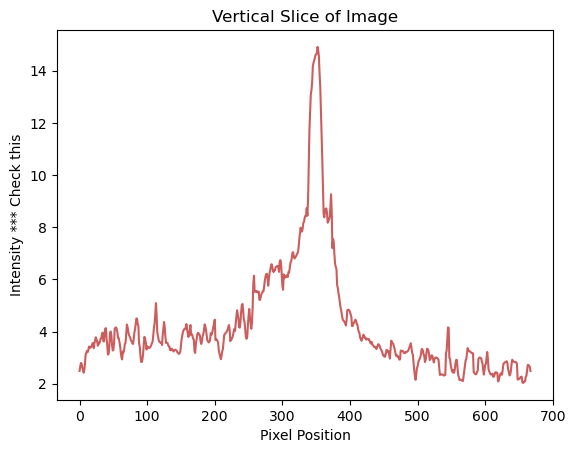

In [18]:
# Vertical Averaging might give smoother spectral curve
img_mean = img.mean(axis=0)
plt.plot(img_mean, color='indianred')
plt.xlabel('Pixel Position')
plt.ylabel('Intensity *** Check this')
plt.title("Vertical Slice of Image")
plt.show()

In [19]:
# Calibration Values - in this regime, you need to identify different peaks as different wavelengths - for calibration purposes
red_true = 0
green_true = 0

## RGBA Analysis

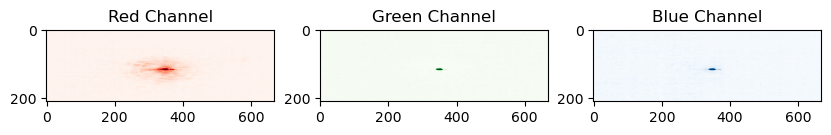

In [20]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the RGBA image
img = Image.open(img_path).convert("RGBA")

# Split the RGBA image into individual color channels
r, g, b, a = img.split()

# Plot the red, green, and blue channels
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(r, cmap="Reds")
plt.title("Red Channel")
plt.subplot(132)
plt.imshow(g, cmap="Greens")
plt.title("Green Channel")
plt.subplot(133)
plt.imshow(b, cmap="Blues")
plt.title("Blue Channel")
plt.show()

In [33]:
imgg = iio.imread(img_path)
#red, green, blue, asp = imgg.split()
type(imgg)

numpy.ndarray

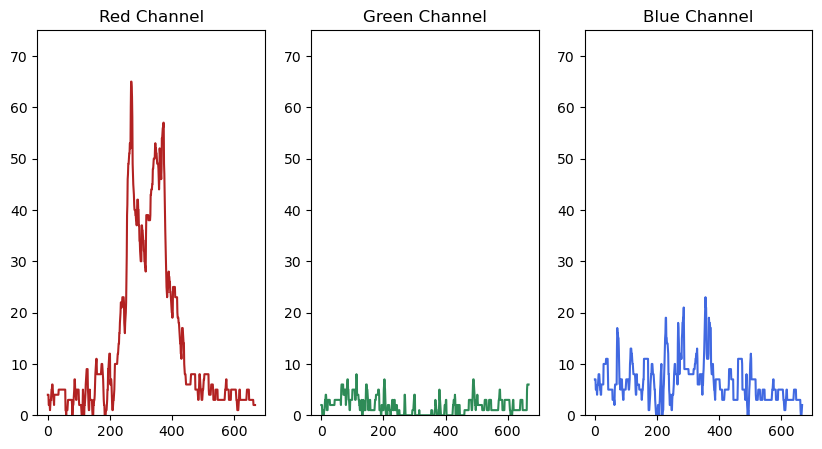

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the RGBA image
img = Image.open(img_path).convert("RGBA")

# Convert the image to a numpy array
img_array = np.array(img)

# Extract the red, green, and blue channels
red_channel = img_array[:,:,0]
green_channel = img_array[:,:,1]
blue_channel = img_array[:,:,2]

# Plot the line slice plots for each channel
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.plot(red_channel[img.height//2], color='firebrick')
plt.title("Red Channel")
plt.ylim(0,75)
plt.subplot(132)
plt.plot(green_channel[img.height//2], color='seagreen')
plt.title("Green Channel")
plt.ylim(0,75)
plt.subplot(133)
plt.plot(blue_channel[img.height//2], color='royalblue')
plt.title("Blue Channel")
plt.ylim(0,75)
plt.show()



In [49]:
red_channel

array([[6, 6, 6, ..., 2, 2, 2],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [7, 7, 7, ..., 5, 5, 4]], dtype=uint8)

## Intensity vs. Wavelength

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the RGBA image
img = Image.open(img_path).convert("RGBA")

# Convert the image to grayscale
gray_img = img.convert("L")

# Convert the grayscale image to a numpy array
gray_array = np.array(gray_img)

# Extract the intensity values and wavelengths for each pixel
intensities = gray_array.flatten()
wavelengths = np.argmax(np.array(img), axis=2).flatten()

(intensities)


139612

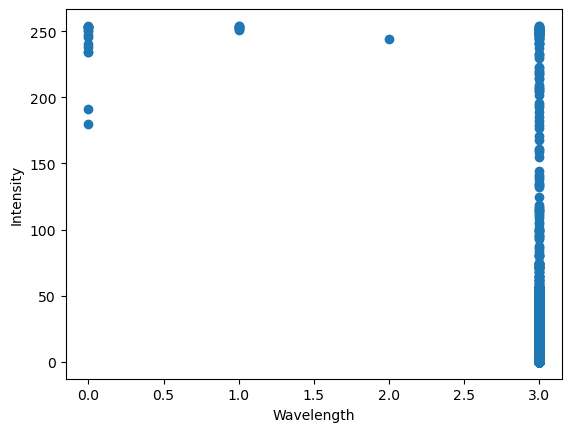

In [57]:
# Plot the intensity vs wavelength
plt.scatter(wavelengths, intensities)
plt.xlabel("Wavelength")
plt.ylabel("Intensity")
plt.show()
